In [1]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import re

In [2]:
# import data - nba injury data from 2010-2011 season through 2017-2018 season
data = pd.read_csv('injuries.csv')
data.columns = ['Date', 'Team', 'Acquired','Relinquished','Notes']
data.head()

Date     Team Acquired                   Relinquished  \
0  2010-10-03    Bulls      NaN                  Carlos Boozer   
1  2010-10-06  Pistons      NaN                  Jonas Jerebko   
2  2010-10-06  Pistons      NaN                  Terrico White   
3  2010-10-08  Blazers      NaN  Jeff Pendergraph / Jeff Ayres   
4  2010-10-08     Nets      NaN                    Troy Murphy   

                                               Notes  
0  fractured bone in right pinky finger (out inde...  
1     torn right Acchilles tendon (out indefinitely)  
2  broken fifth metatarsal in right foot (out ind...  
3          torn ACL in right knee (out indefinitely)  
4             strained lower back (out indefinitely)

In [3]:
# function definitions

def injType(x):
    
    bruise = ['bruise','bruised','bruising','contusion']
    ankle = ['ankle']
    head = ['concussion','headache','skull','head']
    shoulder = ['shoulder']
    knee = ['knee','patella','acl','ACL','meniscus']
    core = ['abdominal', 'core', 'ribs', 'rib', 'abdomen','oblique']
    wrist = ['wrist']
    hand_or_finger = ['hand', 'finger', 'thumb']
    illness = ['illness', 'sickness', 'flu', 'virus','cold', 'gastroenteritis', 'food poisoning','stomach','strep',
              'infection','pneumonia','bronchitis','chicken pox','ill']
    foot = ['foot', 'toe','feet', 'heel']
    arm = ['arm','elbow','bicep','tricep']
    back = ['spine', 'spinal', 'back']
    neck = ['neck']
    face = ['nose','eye','orbital','jaw','face','facial','cornea','cheek','mouth','oral','dental']
    leg = ['shin','fibula','leg','tibia','thigh','gluteus']
    hamstring = ['hamstring']
    calf = ['calf']
    quad = ['quad']
    groin = ['groin','adductor','abductor']
    hip = ['hip']
    rest = ['rest','conditioning']
    achilles = ['achilles','Achilles','acchilles','Acchilles']
    cardio = ['heart', 'lungs', 'lung', 'blood','pulmonary']
    shoulder = ['shoulder', 'rotator cuff']
    
    if any(c in x for c in bruise):
        return 'bruise'
    
    elif any(c in x for c in ankle):
        return 'ankle'
    
    elif any(c in x for c in head):
        return 'head'
    
    elif any(c in x for c in shoulder):
        return 'shoulder'
    
    elif any(c in x for c in knee):
        return 'knee'
    
    elif any(c in x for c in core):
        return 'core'
    
    elif any(c in x for c in wrist):
        return 'wrist'
    
    elif any(c in x for c in hand_or_finger):
        return 'hand/finger'
    
    elif any(c in x for c in illness):
        return 'illness'
    
    elif any(c in x for c in foot):
        return 'foot'
    
    elif any(c in x for c in arm):
        return 'arm'
    
    elif any(c in x for c in back):
        return 'back'
    
    elif any(c in x for c in neck):
        return 'neck'
    
    elif any(c in x for c in face):
        return 'face'
    
    elif any(c in x for c in leg):
        return 'leg'
    
    elif any(c in x for c in hamstring):
        return 'hamstring'
    
    elif any(c in x for c in calf):
        return 'calf'
    
    elif any(c in x for c in quad):
        return 'quad'
    
    elif any(c in x for c in hip):
        return 'hip'
    
    elif any(c in x for c in rest):
        return 'rest'
    
    elif any(c in x for c in groin):
        return 'groin'
    
    elif any(c in x for c in achilles):
        return 'achilles'
    
    elif any(c in x for c in cardio):
        return 'cardio'
    
    elif any(c in x for c in shoulder):
        return 'shoulder'
    
    else:
        return 'Misc.'

In [4]:
# create a dataframe of only the rows in which a player becomes injured
injury_data = data[data['Relinquished'].apply(lambda x: pd.notnull(x))]

In [5]:
# categorize injury by injury type 
injury_data['Injury Type'] = injury_data['Notes'].apply(lambda x: injType(x))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
injury_data.head()

Date     Team Acquired                   Relinquished  \
0  2010-10-03    Bulls      NaN                  Carlos Boozer   
1  2010-10-06  Pistons      NaN                  Jonas Jerebko   
2  2010-10-06  Pistons      NaN                  Terrico White   
3  2010-10-08  Blazers      NaN  Jeff Pendergraph / Jeff Ayres   
4  2010-10-08     Nets      NaN                    Troy Murphy   

                                               Notes  Injury Type  
0  fractured bone in right pinky finger (out inde...  hand/finger  
1     torn right Acchilles tendon (out indefinitely)      illness  
2  broken fifth metatarsal in right foot (out ind...         foot  
3          torn ACL in right knee (out indefinitely)         knee  
4             strained lower back (out indefinitely)         back

In [7]:
# create a column for 'out indefinitely' or 'out for season'
...

In [8]:
# output to a csv file 
injury_data.to_csv('injury_data.csv')

In [9]:
# count of injury by injury type
injury_types = injury_data.groupby('Injury Type').count()[['Notes']]
injury_types['Notes'].sort_values(ascending=False)

Injury Type
knee           1445
ankle          1255
illness         690
foot            579
back            530
bruise          498
rest            425
hamstring       371
hand/finger     315
shoulder        299
groin           266
calf            225
Misc.           218
hip             195
head            188
wrist           138
arm             135
leg             111
face            109
core            101
neck             49
quad             41
cardio           11
Name: Notes, dtype: int64

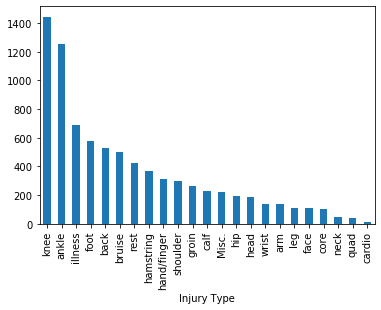

In [10]:
ax = injury_types['Notes'].sort_values(ascending=False).plot.bar()

In [11]:
# what are the misc. injuries?
misc_injuries = injury_data[injury_data['Injury Type']=='Misc.']
misc_injuries

Date       Team Acquired           Relinquished  \
44    2010-11-08      Magic      NaN        Mickael Pietrus   
71    2010-11-17       Jazz      NaN         Kyrylo Fesenko   
84    2010-11-22    Hornets      NaN   Marcus Thornton (T.)   
394   2011-02-03      Bucks      NaN  Chris Douglas-Roberts   
479   2011-02-25    Blazers      NaN         Gerald Wallace   
...          ...        ...      ...                    ...   
9459  2018-02-17     Lakers      NaN          Channing Frye   
9472  2018-02-24  Grizzlies      NaN             Marc Gasol   
9473  2018-02-24     Lakers      NaN          Channing Frye   
9552  2018-03-13   Clippers      NaN          Avery Bradley   
9597  2018-03-21       Nets      NaN       Dante Cunningham   

                                                  Notes Injury Type  
44                                                  DNP       Misc.  
71                                      dizziness (DNP)       Misc.  
84                                                  DNP       Misc.  
394                                                 DNP       Misc.  
479                                                 DNP       Misc.  
...                                                 ...         ...  
9459                    appendectomy (out indefinitely)       Misc.  
9472                                                DNP       Misc.  
9473                 recovering from appendectomy (DTD)       Misc.  
9552  surgery to repair athletic pubalgia / sports h...       Misc.  
9597                                                DNP       Misc.  

[218 rows x 6 columns]

In [12]:
# divide the injury data into separate data frames for each season

# 2010-2011
injury_data_10 = injury_data[(injury_data['Date'] < '2011-08-01') & (injury_data['Date'] > '2010-10-01')]

# 2011-2012
injury_data_11 = injury_data[(injury_data['Date'] < '2012-08-01') & (injury_data['Date'] > '2011-10-01')]

# 2012-2013
injury_data_12 = injury_data[(injury_data['Date'] < '2013-08-01') & (injury_data['Date'] > '2012-10-01')]

# 2013-2014
injury_data_13 = injury_data[(injury_data['Date'] < '2014-08-01') & (injury_data['Date'] > '2013-10-01')]

# 2014-2015
injury_data_14 = injury_data[(injury_data['Date'] < '2015-08-01') & (injury_data['Date'] > '2014-10-01')]

# 2015-2016
injury_data_15 = injury_data[(injury_data['Date'] < '2016-08-01') & (injury_data['Date'] > '2015-10-01')]

# 2016-2017
injury_data_16 = injury_data[(injury_data['Date'] < '2017-08-01') & (injury_data['Date'] > '2016-10-01')]

# 2017-2018
injury_data_17 = injury_data[(injury_data['Date'] < '2018-08-01') & (injury_data['Date'] > '2017-10-01')]

Total number of injuries:  824


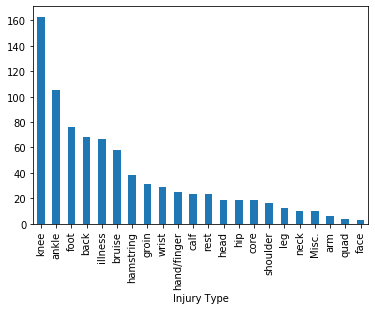

In [13]:
# injury types for 2010-2011 season - lockout year
injury_types_10 = injury_data_10.groupby('Injury Type').count()[['Notes']]
injury_types_10['Notes'].sort_values(ascending=False)

ax = injury_types_10['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_10))

Total number of injuries:  1352


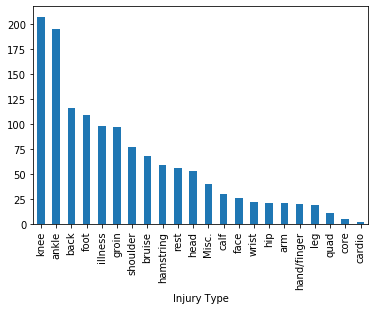

In [14]:
# injury types for 2011-2012 season
injury_types_11 = injury_data_11.groupby('Injury Type').count()[['Notes']]
injury_types_11['Notes'].sort_values(ascending=False)

ax = injury_types_11['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_11))

Total number of injuries:  1217


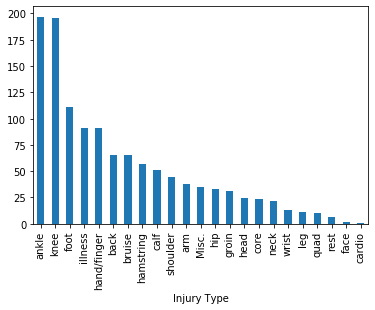

In [15]:
# injury types for 2012-2013 season
injury_types_12 = injury_data_12.groupby('Injury Type').count()[['Notes']]
injury_types_12['Notes'].sort_values(ascending=False)

ax = injury_types_12['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_12))

Total number of injuries:  1780


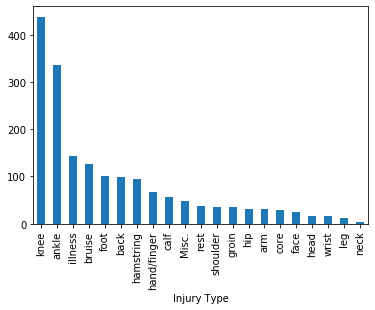

In [16]:
# injury types for 2013-2014 season
injury_types_13 = injury_data_13.groupby('Injury Type').count()[['Notes']]
injury_types_13['Notes'].sort_values(ascending=False)

ax = injury_types_13['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_13))

Total number of injuries:  666


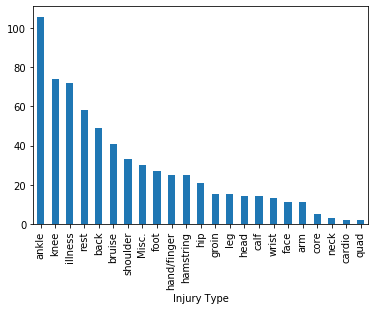

In [17]:
# injury types for 2014-2015 season
injury_types_14 = injury_data_14.groupby('Injury Type').count()[['Notes']]
injury_types_14['Notes'].sort_values(ascending=False)

ax = injury_types_14['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_14))

In [18]:
injury_types_14

Notes
Injury Type       
Misc.           30
ankle          106
arm             11
back            49
bruise          41
calf            14
cardio           2
core             5
face            11
foot            27
groin           15
hamstring       25
hand/finger     25
head            14
hip             21
illness         72
knee            74
leg             15
neck             3
quad             2
rest            58
shoulder        33
wrist           13

Total number of injuries:  809


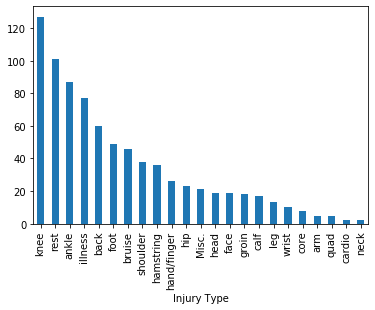

In [19]:
# injury types for 2015-2016 season
injury_types_15 = injury_data_15.groupby('Injury Type').count()[['Notes']]
injury_types_15['Notes'].sort_values(ascending=False)

ax = injury_types_15['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_15))

Total number of injuries:  842


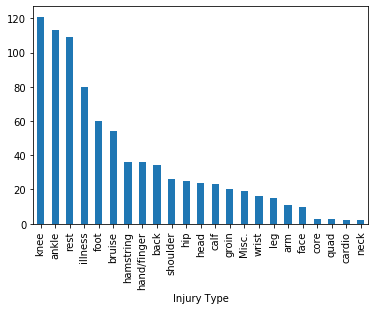

In [20]:
# injury types for 2016-2017 season
injury_types_16 = injury_data_16.groupby('Injury Type').count()[['Notes']]
injury_types_16['Notes'].sort_values(ascending=False)

ax = injury_types_16['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_16))

Total number of injuries:  644


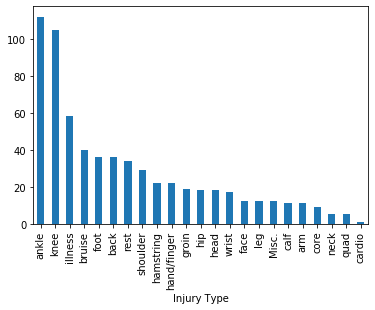

In [21]:
# injury types for the 2017-2018 season
injury_types_17 = injury_data_17.groupby('Injury Type').count()[['Notes']]
injury_types_17['Notes'].sort_values(ascending=False)

ax = injury_types_17['Notes'].sort_values(ascending=False).plot.bar()
print('Total number of injuries: ', len(injury_data_17))

In [22]:
# nba player per game statistics for each season
list_of_files = [f for f in listdir('nba_player_stats') if isfile(join('nba_player_stats', f))]
list_of_files

['2015-2016_nba_player_stats.txt',
 '2017-2018_nba_player_stats.txt',
 '2014-2015_nba_player_stats.txt',
 '2016-2017_nba_player_stats.txt',
 '2012-2013_nba_player_stats.txt',
 '2013-2014_nba_player_stats.txt',
 '2010-2011_nba_player_stats.txt',
 '2018-2019_nba_player_stats.txt',
 '2011-2012_nba_player_stats.txt']

In [23]:
#what types of players get what types of injuries
#fouls / free throws per minute
#does position / play style correlate with injury frequency? 

In [24]:
stats = pd.read_csv('nba_player_stats/' + list_of_files[1]) #read in the statistics from 17-18 NBA season
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)
stats #normalize data

Rk                              Player    Pos  Age   Tm   G  GS    MP  \
0      1              Álex Abrines\abrinal01     SG   24  OKC  75   8  15.1   
1      2                  Quincy Acy\acyqu01     PF   27  BRK  70   8  19.4   
2      3              Steven Adams\adamsst01      C   24  OKC  76  76  32.7   
3      4               Bam Adebayo\adebaba01      C   20  MIA  69  19  19.8   
4      5             Arron Afflalo\afflaar01     SG   32  ORL  53   3  12.9   
5      6              Cole Aldrich\aldrico01      C   29  MIN  21   0   2.3   
6      7         LaMarcus Aldridge\aldrila01      C   32  SAS  75  75  33.5   
7      8             Jarrett Allen\allenja01      C   19  BRK  72  31  20.0   
8      9              Kadeem Allen\allenka01     PG   25  BOS  18   1   5.9   
9     10                Tony Allen\allento01     SF   36  NOP  22   0  12.4   
10    11           Al-Farouq Aminu\aminual01     PF   27  POR  69  67  30.0   
11    12           Justin Anderson\anderju01     SF   24  PHI  38   0  13.7   
12    13             Kyle Anderson\anderky01     SF   24  SAS  74  67  26.7   
13    14             Ryan Anderson\anderry01     PF   29  HOU  66  50  26.1   
14    15              Ike Anigbogu\anigbik01      C   19  IND  11   0   2.7   
15    16     Giannis Antetokounmpo\antetgi01     PF   23  MIL  75  75  36.7   
16    17           Carmelo Anthony\anthoca01     PF   33  OKC  78  78  32.1   
17    18                OG Anunoby\anunoog01     SF   20  TOR  74  62  20.0   
18    19          Ryan Arcidiacono\arcidry01     PG   23  CHI  24   0  12.7   
19    20              Trevor Ariza\arizatr01     SF   32  HOU  67  67  33.9   
20    21            Darrell Arthur\arthuda01     PF   29  DEN  19   1   7.4   
21    22               Jamel Artis\artisja01     SG   25  ORL  15   1  18.6   
22    23                  Ömer Aşık\asikom01      C   31  TOT  18   0  10.1   
23    23                  Ömer Aşık\asikom01      C   31  NOP  14   0   8.6   
24    23                  Ömer Aşık\asikom01      C   31  CHI   4   0  15.3   
25    24             D.J. Augustin\augusdj01     PG   30  ORL  75  36  23.5   
26    25              Luke Babbitt\babbilu01     SF   28  TOT  50  14  14.3   
27    25              Luke Babbitt\babbilu01     SF   28  ATL  37   9  15.4   
28    25              Luke Babbitt\babbilu01     SF   28  MIA  13   5  11.2   
29    26              Dwayne Bacon\bacondw01     SG   22  CHO  53   6  13.5   
30    27                 Ron Baker\bakerro01     SG   24  NYK  29   1  13.3   
31    28              Wade Baldwin\baldwwa01     PG   21  POR   7   0  11.4   
32    29                 Lonzo Ball\balllo01     PG   20  LAL  52  50  34.2   
33    30                J.J. Barea\bareajo01     PG   33  DAL  69  10  23.2   
34    31           Harrison Barnes\barneha02     PF   25  DAL  77  77  34.2   
35    32               Will Barton\bartowi01     SG   27  DEN  81  40  33.1   
36    33             Nicolas Batum\batumni01     SG   29  CHO  64  64  31.0   
37    34            Jerryd Bayless\bayleje01     SG   29  PHI  39  11  23.7   
38    35               Aron Baynes\baynear01      C   31  BOS  81  67  18.3   
39    36             Kent Bazemore\bazemke01     SG   28  ATL  65  65  27.5   
40    37               Bradley Beal\bealbr01     SG   24  WAS  82  82  36.3   
41    38             Malik Beasley\beaslma01     SG   21  DEN  62   0   9.4   
42    39           Michael Beasley\beaslmi01     PF   29  NYK  74  30  22.3   
43    40           Marco Belinelli\belinma01     SG   31  TOT  80   2  24.3   
44    40           Marco Belinelli\belinma01     SG   31  ATL  52   1  23.3   
45    40           Marco Belinelli\belinma01     SG   31  PHI  28   1  26.3   
46    41                Jordan Bell\belljo01      C   23  GSW  57  13  14.2   
47    42           DeAndre' Bembry\bembrde01     SF   23  ATL  26   3  17.5   
48    43             Dragan Bender\bendedr01     PF   20  PHO  82  37  25.2   
49    44             Dāvis Bertāns\bertada01     PF   25

In [25]:
ex = stats['Player'][0]
regname = r".*?(?=\\)"  # use regular expression to extract player name 
names = re.findall(regname, ex)
names[0]

'Álex Abrines'

In [26]:
#injury_data['Injury Type'] = injury_data['Notes'].apply(lambda x: injType(x))

stats['Player'] = stats['Player'].apply(lambda x: (re.findall(regname,x))[0] )
stats

Rk                    Player    Pos  Age   Tm   G  GS    MP    FG   FGA  \
0      1              Álex Abrines     SG   24  OKC  75   8  15.1   1.5   3.9   
1      2                Quincy Acy     PF   27  BRK  70   8  19.4   1.9   5.2   
2      3              Steven Adams      C   24  OKC  76  76  32.7   5.9   9.4   
3      4               Bam Adebayo      C   20  MIA  69  19  19.8   2.5   4.9   
4      5             Arron Afflalo     SG   32  ORL  53   3  12.9   1.2   3.1   
5      6              Cole Aldrich      C   29  MIN  21   0   2.3   0.2   0.7   
6      7         LaMarcus Aldridge      C   32  SAS  75  75  33.5   9.2  18.0   
7      8             Jarrett Allen      C   19  BRK  72  31  20.0   3.3   5.5   
8      9              Kadeem Allen     PG   25  BOS  18   1   5.9   0.3   1.2   
9     10                Tony Allen     SF   36  NOP  22   0  12.4   2.0   4.1   
10    11           Al-Farouq Aminu     PF   27  POR  69  67  30.0   3.3   8.4   
11    12           Justin Anderson     SF   24  PHI  38   0  13.7   2.3   5.3   
12    13             Kyle Anderson     SF   24  SAS  74  67  26.7   3.1   5.9   
13    14             Ryan Anderson     PF   29  HOU  66  50  26.1   3.1   7.3   
14    15              Ike Anigbogu      C   19  IND  11   0   2.7   0.4   0.8   
15    16     Giannis Antetokounmpo     PF   23  MIL  75  75  36.7   9.9  18.7   
16    17           Carmelo Anthony     PF   33  OKC  78  78  32.1   6.1  15.0   
17    18                OG Anunoby     SF   20  TOR  74  62  20.0   2.2   4.7   
18    19          Ryan Arcidiacono     PG   23  CHI  24   0  12.7   0.7   1.7   
19    20              Trevor Ariza     SF   32  HOU  67  67  33.9   4.0   9.7   
20    21            Darrell Arthur     PF   29  DEN  19   1   7.4   1.2   2.5   
21    22               Jamel Artis     SG   25  ORL  15   1  18.6   2.1   5.3   
22    23                 Ömer Aşık      C   31  TOT  18   0  10.1   0.5   1.2   
23    23                 Ömer Aşık      C   31  NOP  14   0   8.6   0.5   1.1   
24    23                 Ömer Aşık      C   31  CHI   4   0  15.3   0.5   1.5   
25    24             D.J. Augustin     PG   30  ORL  75  36  23.5   3.3   7.2   
26    25              Luke Babbitt     SF   28  TOT  50  14  14.3   1.8   4.3   
27    25              Luke Babbitt     SF   28  ATL  37   9  15.4   2.2   4.5   
28    25              Luke Babbitt     SF   28  MIA  13   5  11.2   0.8   3.6   
29    26              Dwayne Bacon     SG   22  CHO  53   6  13.5   1.4   3.6   
30    27                 Ron Baker     SG   24  NYK  29   1  13.3   0.7   2.0   
31    28              Wade Baldwin     PG   21  POR   7   0  11.4   2.0   3.0   
32    29                Lonzo Ball     PG   20  LAL  52  50  34.2   3.9  10.8   
33    30                J.J. Barea     PG   33  DAL  69  10  23.2   4.4  10.0   
34    31           Harrison Barnes     PF   25  DAL  77  77  34.2   7.0  15.7   
35    32               Will Barton     SG   27  DEN  81  40  33.1   5.7  12.7   
36    33             Nicolas Batum     SG   29  CHO  64  64  31.0   4.2  10.2   
37    34            Jerryd Bayless     SG   29  PHI  39  11  23.7   2.8   6.7   
38    35               Aron Baynes      C   31  BOS  81  67  18.3   2.6   5.5   
39    36             Kent Bazemore     SG   28  ATL  65  65  27.5   4.4  10.4   
40    37              Bradley Beal     SG   24  WAS  82  82  36.3   8.3  18.1   
41    38             Malik Beasley     SG   21  DEN  62   0   9.4   1.2   2.9   
42    39           Michael Beasley     PF   29  NYK  74  30  22.3   5.5  10.9   
43    40           Marco Belinelli     SG   31  TOT  80   2  24.3   4.2   9.6   
44    40           Marco Belinelli     SG   31  ATL  52   1  23.3   3.8   9.3   
45    40           Marco Belinelli     SG   31  PHI  28   1  26.3   4.9  10.0   
46    41               Jordan Bell      C   23  GSW  57  13  14.2   2.0   3.2   
47    42           DeAndre' Bembry     SF   23  ATL  26   3  17.5   2.0   4.9   
48    43             Dragan Bender   

In [27]:
stats = stats.drop(columns=["Rk","FG%","3P%","2P%","eFG%","FT%"]) #drop columns with percentages, unneeded
stats


Player    Pos  Age   Tm   G  GS    MP    FG   FGA   3P  \
0                Álex Abrines     SG   24  OKC  75   8  15.1   1.5   3.9  1.1   
1                  Quincy Acy     PF   27  BRK  70   8  19.4   1.9   5.2  1.5   
2                Steven Adams      C   24  OKC  76  76  32.7   5.9   9.4  0.0   
3                 Bam Adebayo      C   20  MIA  69  19  19.8   2.5   4.9  0.0   
4               Arron Afflalo     SG   32  ORL  53   3  12.9   1.2   3.1  0.5   
5                Cole Aldrich      C   29  MIN  21   0   2.3   0.2   0.7  0.0   
6           LaMarcus Aldridge      C   32  SAS  75  75  33.5   9.2  18.0  0.4   
7               Jarrett Allen      C   19  BRK  72  31  20.0   3.3   5.5  0.1   
8                Kadeem Allen     PG   25  BOS  18   1   5.9   0.3   1.2  0.0   
9                  Tony Allen     SF   36  NOP  22   0  12.4   2.0   4.1  0.2   
10            Al-Farouq Aminu     PF   27  POR  69  67  30.0   3.3   8.4  1.8   
11            Justin Anderson     SF   24  PHI  38   0  13.7   2.3   5.3  0.9   
12              Kyle Anderson     SF   24  SAS  74  67  26.7   3.1   5.9  0.3   
13              Ryan Anderson     PF   29  HOU  66  50  26.1   3.1   7.3  2.0   
14               Ike Anigbogu      C   19  IND  11   0   2.7   0.4   0.8  0.0   
15      Giannis Antetokounmpo     PF   23  MIL  75  75  36.7   9.9  18.7  0.6   
16            Carmelo Anthony     PF   33  OKC  78  78  32.1   6.1  15.0  2.2   
17                 OG Anunoby     SF   20  TOR  74  62  20.0   2.2   4.7  1.0   
18           Ryan Arcidiacono     PG   23  CHI  24   0  12.7   0.7   1.7  0.4   
19               Trevor Ariza     SF   32  HOU  67  67  33.9   4.0   9.7  2.5   
20             Darrell Arthur     PF   29  DEN  19   1   7.4   1.2   2.5  0.4   
21                Jamel Artis     SG   25  ORL  15   1  18.6   2.1   5.3  0.5   
22                  Ömer Aşık      C   31  TOT  18   0  10.1   0.5   1.2  0.0   
23                  Ömer Aşık      C   31  NOP  14   0   8.6   0.5   1.1  0.0   
24                  Ömer Aşık      C   31  CHI   4   0  15.3   0.5   1.5  0.0   
25              D.J. Augustin     PG   30  ORL  75  36  23.5   3.3   7.2  1.5   
26               Luke Babbitt     SF   28  TOT  50  14  14.3   1.8   4.3  1.2   
27               Luke Babbitt     SF   28  ATL  37   9  15.4   2.2   4.5  1.3   
28               Luke Babbitt     SF   28  MIA  13   5  11.2   0.8   3.6  0.8   
29               Dwayne Bacon     SG   22  CHO  53   6  13.5   1.4   3.6  0.2   
30                  Ron Baker     SG   24  NYK  29   1  13.3   0.7   2.0  0.4   
31               Wade Baldwin     PG   21  POR   7   0  11.4   2.0   3.0  0.6   
32                 Lonzo Ball     PG   20  LAL  52  50  34.2   3.9  10.8  1.7   
33                 J.J. Barea     PG   33  DAL  69  10  23.2   4.4  10.0  1.7   
34            Harrison Barnes     PF   25  DAL  77  77  34.2   7.0  15.7  1.5   
35                Will Barton     SG   27  DEN  81  40  33.1   5.7  12.7  1.9   
36              Nicolas Batum     SG   29  CHO  64  64  31.0   4.2  10.2  1.4   
37             Jerryd Bayless     SG   29  PHI  39  11  23.7   2.8   6.7  1.4   
38                Aron Baynes      C   31  BOS  81  67  18.3   2.6   5.5  0.0   
39              Kent Bazemore     SG   28  ATL  65  65  27.5   4.4  10.4  1.7   
40               Bradley Beal     SG   24  WAS  82  82  36.3   8.3  18.1  2.4   
41              Malik Beasley     SG   21  DEN  62   0   9.4   1.2   2.9  0.5   
42            Michael Beasley     PF   29  NYK  74  30  22.3   5.5  10.9  0.5   
43            Marco Belinelli     SG   31  TOT  80   2  24.3   4.2   9.6  1.9   
44            Marco Belinelli     SG   31  ATL  52   1  23.3   3.8   9.3  1.8   
45            Marco Belinelli     SG   31  PHI  28   1  26.3   4.9  10.0  2.0   
46                Jordan Bell      C   23  GSW  57  13  14.2   2.0   3.2  0.0   
47            DeAndre' Bembry     SF   23  ATL  26   3  17.5   2.0   4.9  0.4   
48              Dragan Bender     PF   20  PHO  82  37

In [28]:
# for i in range(0,len(stats['Player'])):
#     stats['Player'][i] = stats['Player'][i][0]
stats["Player"].apply(lambda x: print(x))


Álex Abrines
Quincy Acy
Steven Adams
Bam Adebayo
Arron Afflalo
Cole Aldrich
LaMarcus Aldridge
Jarrett Allen
Kadeem Allen
Tony Allen
Al-Farouq Aminu
Justin Anderson
Kyle Anderson
Ryan Anderson
Ike Anigbogu
Giannis Antetokounmpo
Carmelo Anthony
OG Anunoby
Ryan Arcidiacono
Trevor Ariza
Darrell Arthur
Jamel Artis
Ömer Aşık
Ömer Aşık
Ömer Aşık
D.J. Augustin
Luke Babbitt
Luke Babbitt
Luke Babbitt
Dwayne Bacon
Ron Baker
Wade Baldwin
Lonzo Ball
J.J. Barea
Harrison Barnes
Will Barton
Nicolas Batum
Jerryd Bayless
Aron Baynes
Kent Bazemore
Bradley Beal
Malik Beasley
Michael Beasley
Marco Belinelli
Marco Belinelli
Marco Belinelli
Jordan Bell
DeAndre' Bembry
Dragan Bender
Dāvis Bertāns
Patrick Beverley
Khem Birch
Jabari Bird
Bismack Biyombo
Nemanja Bjelica
Tarik Black
Antonio Blakeney
Eric Bledsoe
Eric Bledsoe
Eric Bledsoe
Vander Blue
Bogdan Bogdanović
Bojan Bogdanović
Andrew Bogut
Joel Bolomboy
Devin Booker
Trevor Booker
Trevor Booker
Trevor Booker
Trevor Booker
Chris Boucher
Avery Bradley
Avery B

0      None
1      None
2      None
3      None
4      None
5      None
6      None
7      None
8      None
9      None
10     None
11     None
12     None
13     None
14     None
15     None
16     None
17     None
18     None
19     None
20     None
21     None
22     None
23     None
24     None
25     None
26     None
27     None
28     None
29     None
30     None
31     None
32     None
33     None
34     None
35     None
36     None
37     None
38     None
39     None
40     None
41     None
42     None
43     None
44     None
45     None
46     None
47     None
48     None
49     None
50     None
51     None
52     None
53     None
54     None
55     None
56     None
57     None
58     None
59     None
60     None
61     None
62     None
63     None
64     None
65     None
66     None
67     None
68     None
69     None
70     None
71     None
72     None
73     None
74     None
75     None
76     None
77     None
78     None
79     None
80     None
81     None
82     None
83  

In [29]:
query_str = 'Player == "Eric Bledsoe"'
bird_id = stats.query(query_str)
bird_id = bird_id.iloc[0,:]

bird_id.head()





Player    Eric Bledsoe
Pos                 PG
Age                 28
Tm                 TOT
G                   74
Name: 57, dtype: object

In [30]:
stats = stats.groupby("Player").apply(lambda x: x.iloc[0]).reset_index(drop=True) #remove duplicate rows, averaged into TOT 
stats.groupby("Player").size().max() #check for duplicate names, 

1

In [31]:
stats

Player    Pos  Age   Tm   G  GS    MP    FG   FGA   3P  \
0                Aaron Brooks     PG   33  MIN  32   1   5.9   0.9   2.2  0.3   
1                Aaron Gordon     PF   22  ORL  58  57  32.9   6.5  14.9  2.0   
2              Aaron Harrison     SG   23  DAL   9   3  25.9   2.1   7.7  1.0   
3               Aaron Jackson     PG   31  HOU   1   0  35.0   3.0   9.0  1.0   
4                 Abdel Nader     SF   24  BOS  48   1  10.9   1.0   3.1  0.5   
5               Adreian Payne     PF   26  ORL   5   0   8.6   1.4   2.0  0.4   
6                  Al Horford      C   31  BOS  72  72  31.6   5.1  10.5  1.3   
7                Al Jefferson      C   33  IND  36   1  13.4   3.1   5.8  0.0   
8             Al-Farouq Aminu     PF   27  POR  69  67  30.0   3.3   8.4  1.8   
9               Alan Williams     PF   25  PHO   5   0  14.0   1.4   3.6  0.0   
10                 Alec Burks     SG   26  UTA  64   1  16.5   2.7   6.5  0.7   
11                Alec Peters     PF   22  PHO  20   0  11.3   1.4   3.7  0.9   
12                Alex Caruso     PG   23  LAL  37   7  15.2   1.4   3.1  0.4   
13                   Alex Len      C   24  PHO  69  13  20.2   3.1   5.5  0.0   
14             Alex Poythress     PF   24  IND  25   0   4.2   0.4   1.0  0.2   
15           Alfonzo McKinnie     SF   25  TOR  14   0   3.8   0.6   1.1  0.2   
16               Allen Crabbe     SG   25  BRK  75  68  29.3   4.5  11.0  2.7   
17               Amir Johnson      C   30  PHI  74  18  15.8   1.9   3.5  0.1   
18             Andre Drummond      C   24  DET  78  78  33.7   6.0  11.3  0.0   
19             Andre Iguodala     SF   34  GSW  64   7  25.3   2.3   5.0  0.5   
20               Andre Ingram     SG   32  LAL   2   0  32.0   4.0   8.5  2.5   
21             Andre Roberson     SG   26  OKC  39  39  26.6   2.2   4.2  0.2   
22               Andrew Bogut      C   33  LAL  24   5   9.0   0.7   1.0  0.0   
23            Andrew Harrison     PG   23  MEM  56  46  23.7   3.2   7.7  0.8   
24               Andrew White     SF   24  ATL  15   0  13.9   1.7   4.9  1.2   
25             Andrew Wiggins     SF   22  MIN  82  82  36.3   6.9  15.9  1.4   
26                 Ante Žižić      C   21  CLE  32   2   6.7   1.5   2.1  0.0   
27              Anthony Brown     SF   25  MIN   1   0   4.0   1.0   1.0  1.0   
28              Anthony Davis     PF   24  NOP  75  75  36.4  10.4  19.5  0.7   
29           Anthony Tolliver     PF   32  DET  79  14  22.2   2.8   6.0  2.0   
30           Antonio Blakeney     SG   21  CHI  19   0  16.5   2.8   7.5  0.8   
31         Antonius Cleveland     SG   23  TOT  17   0   7.2   0.5   1.2  0.2   
32                Aron Baynes      C   31  BOS  81  67  18.3   2.6   5.5  0.0   
33              Arron Afflalo     SG   32  ORL  53   3  12.9   1.2   3.1  0.5   
34              Austin Rivers     SG   25  LAC  61  59  33.7   5.6  13.2  2.2   
35              Avery Bradley     SG   27  TOT  46  46  31.2   5.6  13.6  1.6   
36                Bam Adebayo      C   20  MIA  69  19  19.8   2.5   4.9  0.0   
37               Ben McLemore     SG   24  MEM  56  17  19.5   2.8   6.7  1.0   
38                  Ben Moore     PF   22  IND   2   0   4.5   0.0   0.0  0.0   
39                Ben Simmons     PG   21  PHI  81  81  33.7   6.7  12.3  0.0   
40            Bismack Biyombo      C   25  ORL  82  25  18.2   2.2   4.3  0.0   
41              Blake Griffin     PF   28  TOT  58  58  34.0   7.5  17.2  1.9   
42           Boban Marjanović      C   29  TOT  39   1   8.6   2.0   3.8  0.0   
43                Bobby Brown     PG   33  HOU  20   0   5.8   1.0   2.9  0.6   
44               Bobby Portis     PF   22  CHI  73   4  22.5   5.2  11.1  1.1   
45          Bogdan Bogdanović     SG   25  SAC  78  53  27.9   4.4   9.9  1.7   
46           Bojan Bogdanović     SF   28  IND  80  80  30.8   5.1  10.7  1.9   
47               Bradley Beal     SG   24  WAS  82  82  36.3   8.3  18.1  2.4   
48             Brandan Wright     PF   30  TOT  28   1

In [32]:
stats = stats.sort_values(by="PTS", ascending = False).reset_index(drop = True)

In [63]:
stats.sort_values(by="FGA", ascending = False)

Player    Pos  Age   Tm   G  GS    MP    FG   FGA   3P  \
7           Russell Westbrook     PG   29  OKC  80  80  36.4   9.5  21.1  1.2   
0                James Harden     SG   28  HOU  72  72  35.4   9.0  20.1  3.7   
9                Devin Booker     SG   21  PHO  54  54  34.5   8.4  19.5  2.7   
1               Anthony Davis     PF   24  NOP  75  75  36.4  10.4  19.5  0.7   
3              Damian Lillard     PG   27  POR  73  73  36.6   8.5  19.4  3.1   
2                LeBron James     PF   33  CLE  82  82  36.9  10.5  19.3  1.8   
4       Giannis Antetokounmpo     PF   23  MIL  75  75  36.7   9.9  18.7  0.6   
21                CJ McCollum     SG   26  POR  81  81  36.1   8.2  18.6  2.3   
15         Kristaps Porziņģis     PF   22  NYK  48  48  32.4   8.1  18.5  1.9   
10               Kyrie Irving     PG   25  BOS  60  60  32.2   8.9  18.1  2.8   
17               Bradley Beal     SG   24  WAS  82  82  36.3   8.3  18.1  2.4   
6                Kevin Durant     SF   29  GSW  68  68  34.2   9.3  18.0  2.5   
8            DeMarcus Cousins      C   27  NOP  48  48  36.2   8.5  18.0  2.2   
12          LaMarcus Aldridge      C   32  SAS  75  75  33.5   9.2  18.0  0.4   
11             Victor Oladipo     SG   25  IND  75  75  34.0   8.5  17.9  2.1   
13              DeMar DeRozan     SG   28  TOR  80  80  33.9   8.1  17.7  1.1   
24           Donovan Mitchell     SG   21  UTA  79  71  33.4   7.5  17.2  2.4   
22              Blake Griffin     PF   28  TOT  58  58  34.0   7.5  17.2  1.9   
29            Dennis Schröder     PG   24  ATL  67  67  31.0   7.5  17.1  1.1   
19               Kemba Walker     PG   27  CHO  80  80  34.2   7.4  17.0  2.9   
20                Paul George     SF   27  OKC  79  79  36.6   7.3  17.0  3.1   
16               Lou Williams     SG   31  LAC  79  19  32.8   7.4  16.9  2.4   
5               Stephen Curry     PG   29  GSW  51  51  32.0   8.4  16.9  4.2   
14                Joel Embiid      C   23  PHI  63  63  30.3   8.1  16.8  1.0   
28                T.J. Warren     SF   24  PHO  65  65  33.0   8.1  16.4  0.3   
31                  John Wall     PG   27  WAS  41  41  34.4   6.8  16.3  1.5   
27              Klay Thompson     SG   27  GSW  73  73  34.3   7.9  16.2  3.1   
40             Andrew Wiggins     SF   22  MIN  82  82  36.3   6.9  15.9  1.4   
33            Harrison Barnes     PF   25  DAL  77  77  34.2   7.0  15.7  1.5   
30               Tyreke Evans     PG   28  MEM  52  32  30.9   7.0  15.6  2.2   
18               Jimmy Butler     SG   28  MIN  59  59  36.7   7.4  15.6  1.2   
25            Khris Middleton     SF   26  MIL  82  82  36.4   7.2  15.5  1.8   
32               Jrue Holiday     SG   27  NOP  81  81  36.1   7.6  15.4  1.5   
34              Tobias Harris     PF   25  TOT  80  80  33.4   7.0  15.3  2.3   
54            Carmelo Anthony     PF   33  OKC  78  78  32.1   6.1  15.0  2.2   
44               Tim Hardaway     SG   25  NYK  57  54  33.1   6.3  15.0  2.3   
43               Aaron Gordon     PF   22  ORL  58  57  32.9   6.5  14.9  2.0   
66               Dennis Smith     PG   20  DAL  69  69  29.7   5.9  14.8  1.5   
50                Zach LaVine     SG   22  CHI  24  24  27.3   5.7  14.8  1.8   
53             Nikola Vučević      C   27  ORL  57  57  29.5   7.0  14.7  1.1   
26             MarShon Brooks     SG   29  MEM   7   1  27.6   7.3  14.6  2.7   
23         Karl-Anthony Towns      C   22  MIN  82  82  35.6   7.8  14.3  1.5   
46               Goran Dragić     PG   31  MIA  75  75  31.7   6.5  14.3  1.5   
47                 Marc Gasol      C   33  MEM  73  73  33.0   5.9  14.2  1.5   
37                Eric Gordon     SG   29  HOU  69  30  31.2   6.0  14.1  3.2   
39              Evan Fournier     SF   25  ORL  57  57  32.2   6.5  14.1  2.2   
63           D'Angelo Russell     PG   21  BRK  48  35  25.7   5.8  14.0  1.9   
49                Mike Conley     PG   30  MEM  12  12  31.1   5.3  14.0  2.0   
35                 Chris Paul     PG   32  HOU  58  58

In [77]:
#agression metric
#defensive : MP, DRB, STL, BLK, PF
#offensive : MP, FGA, FTA, ORB, AST

mp = .1
drb = 1.2
stl = 2
blk = 2 
pf = 1

ad = stats.sort_values(by="BLK", ascending = False).iloc[0]
num = ad.MP*mp + ad.DRB*drb + ad.STL*stl + ad.BLK*blk + ad.PF*pf
print("Anthony Davis defensive agression: ", num)







Anthony Davis defensive agression:  24.26


In [76]:
fga = .7
fta = 1
orb = 1.2
ast = .4

russ = stats.sort_values(by="FGA", ascending = False).iloc[0]
num = russ.MP*mp + russ.FGA*fga + russ.FTA*fta + russ.AST*ast + russ.ORB*orb
print("Russel Westbrook offensive agression: ", num)


Russel Westbrook offensive agression:  31.91


In [88]:
for i in len(stats):
    x = stats.iloc[i]
    dag = x.MP*mp + x.FGA*fga + x.FTA*fta + x.AST*ast + x.ORB*orb
    stats.iloc[i] = x["DAG" = dag]
stats

SyntaxError: invalid syntax (<ipython-input-88-46608c23124b>, line 4)

In [98]:
for x 

James Harden
SG
28
HOU
72
72
35.4
9.0
20.1
3.7
10.0
5.4
10.1
8.7
10.1
0.6
4.8
5.4
8.8
1.8
0.7
4.4
2.3
30.4
nan


In [35]:
mkdir ./shotchart

mkdir: cannot create directory ‘./shotchart’: File exists


In [36]:
!unzip -o nba-2018-19.zip -d shotchart

Archive:  nba-2018-19.zip
  inflating: shotchart/commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0  
  inflating: shotchart/commonTeamYears?LeagueID=00&Season=2018-19  
  inflating: shotchart/shotchartdetail?PlayerID=101106&PlayerPosition=&Season=2018-19&ContextMeasure=FGA&DateFrom=&DateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&Period=0&Position=&RookieYear=&SeasonSegment=&  
  inflating: shotchart/shotchartdetail?PlayerID=101107&PlayerPosition=&Season=2018-19&ContextMeasure=FGA&DateFrom=&DateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&Period=0&Position=&RookieYear=&SeasonSegment=&  
  inflating: shotchart/shotchartdetail?PlayerID=101108&PlayerPosition=&Season=2018-19&ContextMeasure=FGA&DateFrom=&DateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&Period=0&Position=&RookieYear=&SeasonSegment=&  
  inflating: shotchart/shotch

In [37]:
filecount = !ls -1 ./shotchart/shotchartdetail\?PlayerID=* \
| cut -d '&' -f 1 \
| cut -d '?' -f 2 \
| sort -n \
| uniq \
| wc -l
filecount


['502']

In [38]:
uniqueshotfiles = !ls -1 ./shotchart/shotchartdetail\?PlayerID=* \
| cut -d '&' -f 1 \
| cut -d '?' -f 2 \
| sort -n \
| uniq \

uniqueshotfiles

['PlayerID=101106',
 'PlayerID=101107',
 'PlayerID=101108',
 'PlayerID=101109',
 'PlayerID=101112',
 'PlayerID=101123',
 'PlayerID=101133',
 'PlayerID=101139',
 'PlayerID=101141',
 'PlayerID=101150',
 'PlayerID=101161',
 'PlayerID=101181',
 'PlayerID=1626143',
 'PlayerID=1626144',
 'PlayerID=1626145',
 'PlayerID=1626147',
 'PlayerID=1626149',
 'PlayerID=1626153',
 'PlayerID=1626154',
 'PlayerID=1626155',
 'PlayerID=1626156',
 'PlayerID=1626157',
 'PlayerID=1626158',
 'PlayerID=1626159',
 'PlayerID=1626161',
 'PlayerID=1626162',
 'PlayerID=1626163',
 'PlayerID=1626164',
 'PlayerID=1626167',
 'PlayerID=1626168',
 'PlayerID=1626169',
 'PlayerID=1626170',
 'PlayerID=1626171',
 'PlayerID=1626172',
 'PlayerID=1626174',
 'PlayerID=1626178',
 'PlayerID=1626179',
 'PlayerID=1626181',
 'PlayerID=1626184',
 'PlayerID=1626185',
 'PlayerID=1626187',
 'PlayerID=1626188',
 'PlayerID=1626192',
 'PlayerID=1626195',
 'PlayerID=1626196',
 'PlayerID=1626203',
 'PlayerID=1626204',
 'PlayerID=1626209',
 'Pl

In [39]:
%matplotlib inline

import pandas as pd
import numpy as np
import json

json_str = !cat shotchart/commonTeamYears\?LeagueID\=00\&Season\=2018-19
json_obj = json.loads(json_str[0])
#print(json_obj.keys())

h = json_obj['resultSets'][0]['headers']
d = json_obj['resultSets'][0]['rowSet']
allteams = pd.DataFrame(d,columns =h )

In [40]:
%matplotlib inline

import pandas as pd
import numpy as np
import json

json_str = !cat shotchart/commonTeamYears\?LeagueID\=00\&Season\=2018-19
json_obj = json.loads(json_str[0])
#print(json_obj.keys())

h = json_obj['resultSets'][0]['headers']
d = json_obj['resultSets'][0]['rowSet']
allteams = pd.DataFrame(d,columns =h )

In [41]:
json_str = !cat shotchart/commonallplayers\?LeagueID\=00\&Season\=2018-19\&IsOnlyCurrentSeason\=0
json_obj = json.loads(json_str[0])
#print(json_obj1.keys())

h = json_obj['resultSets'][0]['headers']
d = json_obj['resultSets'][0]['rowSet']
allplayers = pd.DataFrame(d,columns =h ).set_index('PERSON_ID')
allplayers

DISPLAY_LAST_COMMA_FIRST        DISPLAY_FIRST_LAST  ROSTERSTATUS  \
PERSON_ID                                                                      
76001                Abdelnaby, Alaa            Alaa Abdelnaby             0   
76002               Abdul-Aziz, Zaid           Zaid Abdul-Aziz             0   
76003           Abdul-Jabbar, Kareem       Kareem Abdul-Jabbar             0   
51               Abdul-Rauf, Mahmoud        Mahmoud Abdul-Rauf             0   
1505              Abdul-Wahad, Tariq         Tariq Abdul-Wahad             0   
949             Abdur-Rahim, Shareef       Shareef Abdur-Rahim             0   
76005                 Abernethy, Tom             Tom Abernethy             0   
76006                   Able, Forest               Forest Able             0   
76007                Abramovic, John            John Abramovic             0   
203518                 Abrines, Alex              Alex Abrines             0   
101165                   Acker, Alex                Alex Acker             0   
76008               Ackerman, Donald           Donald Ackerman             0   
76009                    Acres, Mark                Mark Acres             0   
76010                 Acton, Charles             Charles Acton             0   
203112                   Acy, Quincy                Quincy Acy             0   
76011                   Adams, Alvan               Alvan Adams             0   
76012                     Adams, Don                 Don Adams             0   
200801                 Adams, Hassan              Hassan Adams             0   
1629824                 Adams, Jalen               Jalen Adams             0   
1629121                Adams, Jaylen              Jaylen Adams             1   
203919                 Adams, Jordan              Jordan Adams             0   
149                   Adams, Michael             Michael Adams             0   
203500                 Adams, Steven              Steven Adams             1   
912                  Addison, Rafael            Rafael Addison             0   
1628389                 Adebayo, Bam               Bam Adebayo             1   
1629061                   Adel, Deng                 Deng Adel             1   
76015                  Adelman, Rick              Rick Adelman             0   
202399                  Adrien, Jeff               Jeff Adrien             0   
201167                Afflalo, Arron             Arron Afflalo             0   
200772                 Ager, Maurice              Maurice Ager             0   
76016                  Aguirre, Mark              Mark Aguirre             0   
201336                 Ahearn, Blake              Blake Ahearn             0   
76017                   Ainge, Danny               Danny Ainge             0   
201582                Ajinca, Alexis             Alexis Ajinca             0   
76018                    Akin, Henry                Henry Akin             0   
203006                 Akognon, Josh              Josh Akognon             0   
1629152      Akoon-Purcell, DeVaughn    DeVaughn Akoon-Purcell             0   
202374                Alabi, Solomon             Solomon Alabi             0   
76019                   Alarie, Mark               Mark Alarie             0   
76020                   Alcorn, Gary               Gary Alcorn             0   
203128               Aldemir, Furkan            Furkan Aldemir             0   
202332                 Aldrich, Cole              Cole Aldrich             0   
200746            Aldridge, LaMarcus         LaMarcus Aldridge             1   
76021               Aleksinas, Chuck           Chuck Aleksinas             0   
1626146             Alexander, Cliff           Cliff Alexander             0   
724                  Alexander, Cory            Cory Alexander             0   
2042             Alexander, Courtney        Courtney Alexander             0   
76022                Alexander, Gary            Gary Alexander             0   
201570      

In [42]:
allshotslist = []

files = !ls -1 shotchart/shotchartdetail*
for f in files:
    json_str = !cat '{f}'
    json_obj = json.loads(json_str[0])
    h = json_obj['resultSets'][0]['headers']
    d = json_obj['resultSets'][0]['rowSet']
    allshotslist.append(pd.DataFrame(d,columns =h ))
    
allshots = pd.concat(allshotslist)

In [43]:
#allshots

In [44]:
##query data for specific players
query_str = 'DISPLAY_FIRST_LAST == "Stephen Curry"'
curry_id = allplayers.query(query_str).index[0]

curry_data = allshots.query('PLAYER_NAME == "Stephen Curry"').astype({'SHOT_MADE_FLAG':'int'})

In [45]:
#field goal percentage table
FGpercent_table = pd.pivot_table(curry_data, values = 'SHOT_MADE_FLAG', index = "PERIOD", columns = ["SHOT_ZONE_RANGE", "SHOT_ZONE_AREA"], fill_value = 0 )
FGpercent_table



SHOT_ZONE_RANGE 16-24 ft.                                    \
SHOT_ZONE_AREA  Center(C) Left Side Center(LC) Left Side(L)   
PERIOD                                                        
1                0.444444             0.200000     0.111111   
2                1.000000             0.625000     0.285714   
3                0.428571             0.333333     0.400000   
4                0.300000             0.666667     1.000000   
5                0.000000             0.000000     1.000000   

SHOT_ZONE_RANGE                                       24+ ft.  \
SHOT_ZONE_AREA  Right Side Center(RC) Right Side(R) Center(C)   
PERIOD                                                          
1                            0.411765      1.000000  0.558824   
2                            0.533333      0.500000  0.406250   
3                            0.636364      0.500000  0.437500   
4                            0.250000      0.333333  0.379310   
5                            0.000000      0.000000  0.666667   

SHOT_ZONE_RANGE                                                          \
SHOT_ZONE_AREA  Left Side Center(LC) Left Side(L) Right Side Center(RC)   
PERIOD                                                                    
1                           0.371795     0.636364              0.387097   
2                           0.558824     0.437500              0.351852   
3                           0.506849     0.500000              0.378049   
4                           0.325000     0.461538              0.467742   
5                           0.000000     1.000000              0.000000   

SHOT_ZONE_RANGE                8-16 ft.                             \
SHOT_ZONE_AREA  Right Side(R) Center(C) Left Side(L) Right Side(R)   
PERIOD                                                               
1                    0.500000  0.571429     0.428571      0.500000   
2                    0.400000  0.636364     0.333333      0.285714   
3                    0.619048  0.285714     0.727273      0.375000   
4                    0.000000  0.400000     0.166667      0.500000   
5                    0.000000  0.000000     0.000000      0.000000   

SHOT_ZONE_RANGE Back Court Shot Less Than 8 ft.  
SHOT_ZONE_AREA   Back Court(BC)       Center(C)  
PERIOD                                           
1                      0.333333        0.591837  
2                      0.000000        0.636364  
3                      0.000000        0.573171  
4                      0.000000        0.565217  
5                      0.000000        1.000000

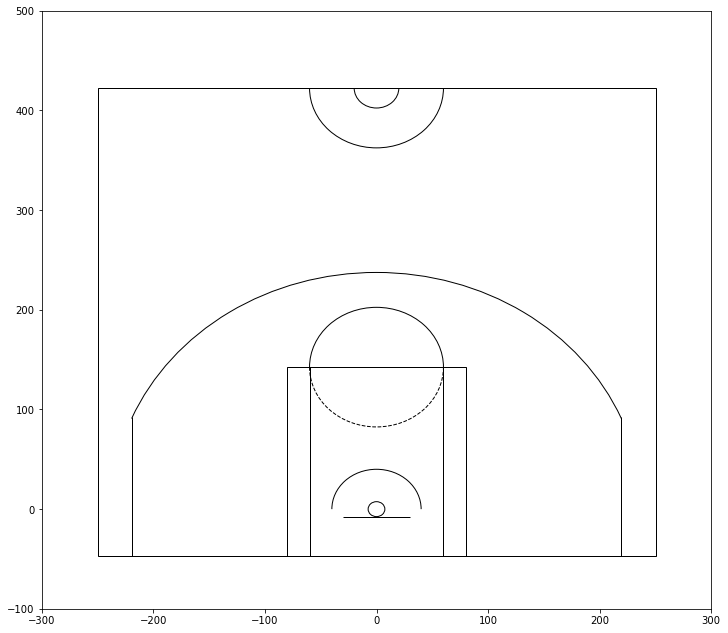

In [46]:
#draw basketball court
def draw_court(ax=None, color='black', lw=1, outer_lines=False):
    
    from matplotlib.patches import Circle, Rectangle, Arc
    from matplotlib.pyplot import gca
    
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, 0, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-219, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((219, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22.5, theta2=157.5, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

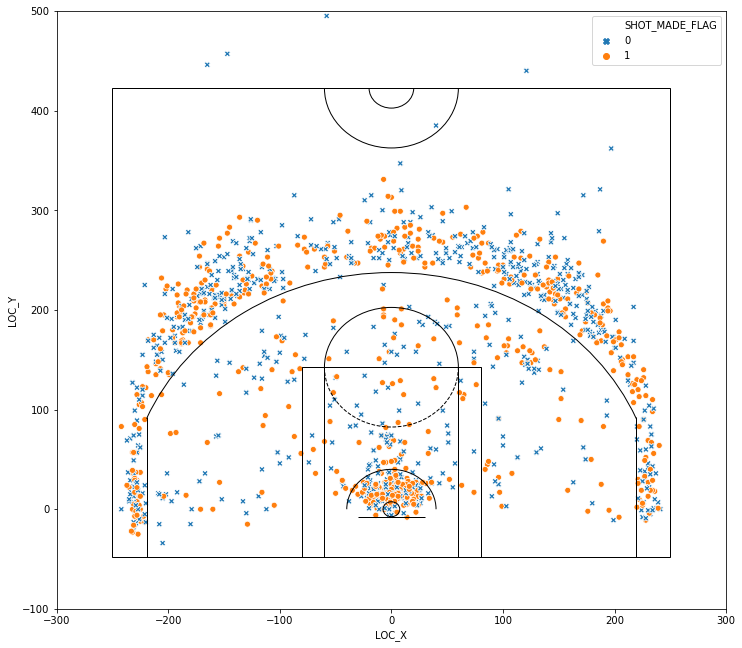

In [47]:
#visualize shots
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 11))
markers = {0 : "X", 1 : "o"}
ax = sns.scatterplot(data=curry_data, x = 'LOC_X', y = 'LOC_Y', style = "SHOT_MADE_FLAG", hue = "SHOT_MADE_FLAG", markers = markers )
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()